In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [8]:
df = pd.read_csv("/content/Data3.csv") #replace with your full path

In [ ]:
df = df.dropna(subset=["Assigned To"])

In [25]:
# Encode categorical columns
categorical_cols = ["Priority", "Status", "Category", "Sub-Category", "Risk Level","Actual Effort (Hours)"]
encoders = {}
for col in categorical_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc

In [26]:
# Define X and Y
X = df[["Priority", "Status", "Category", "Sub-Category", "Risk Level", "Estimated Effort (Hours)", "Actual Effort (Hours)"]]
y = df["Task Name"]

In [28]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Encode string labels to integers
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)

# Step 2: Convert integer labels to one-hot
y_encoded = to_categorical(y_int)


In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [30]:
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_encoded.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7223 - loss: 0.7937 - val_accuracy: 0.9026 - val_loss: 0.4001
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.7453 - val_accuracy: 0.8896 - val_loss: 0.4037
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7510 - loss: 0.7300 - val_accuracy: 0.9026 - val_loss: 0.3676
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7592 - loss: 0.6823 - val_accuracy: 0.9286 - val_loss: 0.3457
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.6466 - val_accuracy: 0.8896 - val_loss: 0.3655
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.7477 - val_accuracy: 0.9026 - val_loss: 0.3341
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7690 - loss: 0.6279 - val_accuracy: 0.8766 - val_loss: 0.3319
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8097 - loss: 0.5808 - val_accuracy: 0.9026 - v

In [21]:
y_encoded = y_encoded.astype('float32')

In [22]:
y_int = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_int)

In [23]:
print(X.dtypes)              # Should all be float32
print(y_encoded.dtype)       # Should also be float32
print(y_encoded.shape[1])    # Should match the number of classes

Priority                     int64
Status                       int64
Category                     int64
Sub-Category                 int64
Risk Level                   int64
Estimated Effort (Hours)     int64
Actual Effort (Hours)       object
dtype: object
float64
94


In [34]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9740 - loss: 0.0706 
Test Loss: 0.06676800549030304
Test Accuracy: 0.9870129823684692


In [ ]:
print(f"Unique classes in 'Assigned To': {y.nunique()}")


Unique classes in 'Assigned To': 530


In [ ]:
print(f"Shape of one-hot encoded y: {y_one_hot.shape}")


Shape of one-hot encoded y: (768, 530)


In [ ]:
model.add(Dense(y_one_hot.shape[1], activation='softmax'))  # Output layer with the correct number of classes


In [ ]:
model.add(Dense(y_one_hot.shape[1], activation='softmax'))  # Output layer with 530 units


In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
validation_data=(X_test, pd.get_dummies(y_test))


In [ ]:
# Count class frequencies
class_counts = y.value_counts()

# Filter out classes that appear only once
valid_classes = class_counts[class_counts > 1].index

# Keep only samples with those classes
filtered_idx = y[y.isin(valid_classes)].index
X = X.loc[filtered_idx]
y = y.loc[filtered_idx]


EVALUATION OF MODEL

In [35]:
# Save the model to a file
model.save('task_classifier_model.h5')

# Save the label encoder for future use
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [36]:
# Example of making a prediction on new data
new_data = np.array([[2, 1, 3, 0, 2, 10.0, 8.0]])  # Replace with actual feature values
new_data = new_data.astype('float32')  # Ensure the input is the correct dtype

# Make prediction
prediction_probs = model.predict(new_data)
predicted_class = prediction_probs.argmax(axis=1)  # Get the index of the predicted class

# Convert back to original label
predicted_label = label_encoder.inverse_transform(predicted_class)
print("Predicted Task Name:", predicted_label[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Task Name: Refactor Legacy Code


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


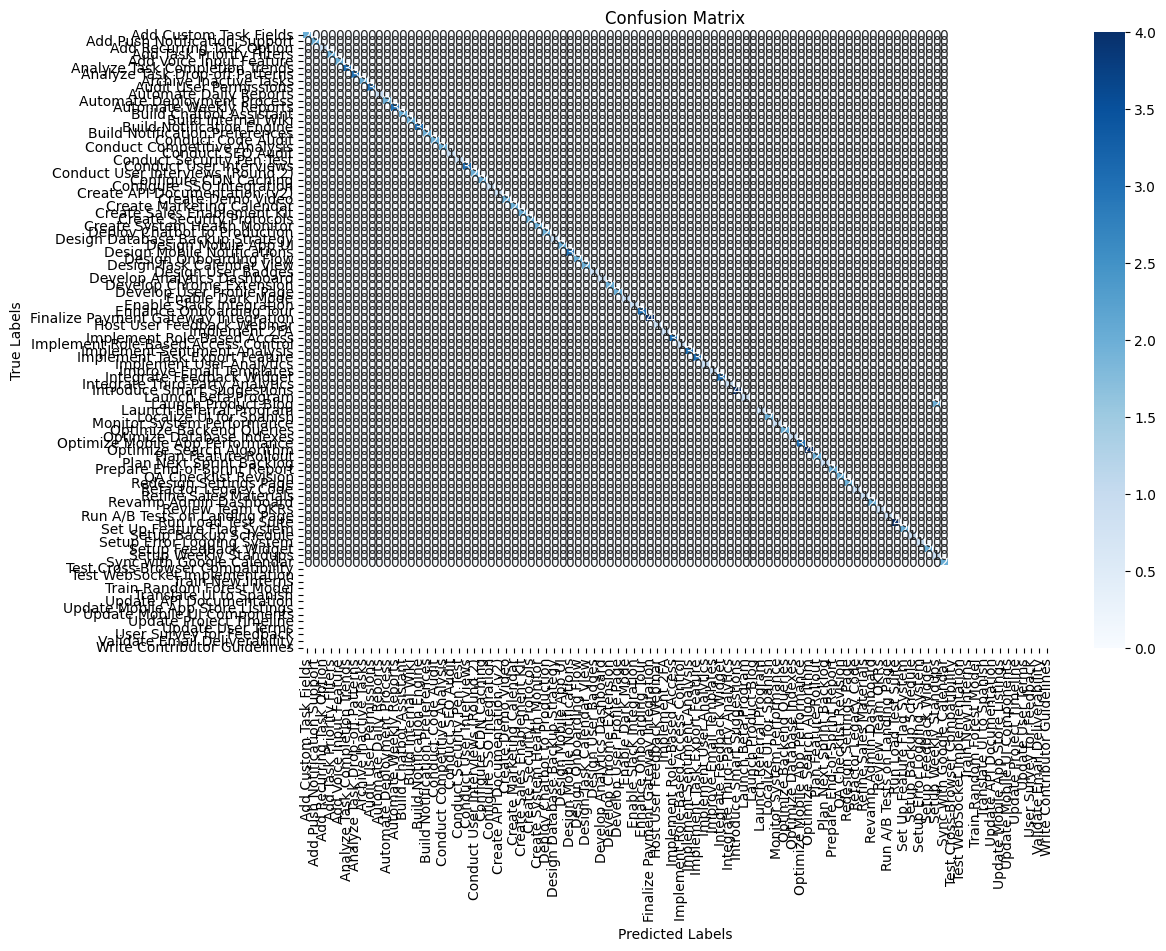

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_class)

# Create a Seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
